# Задание
Необходимо выполнить задания по кластеризации предлагаемых наборов данных в соответствии с предложенным вариантом. 

Выполнить кластеризацию наборов данных, приведенных в табл. 2 и 3, считая, что метки кластеров неизвестны, используя программные реализации иерархических алгоритмов кластеризации (п. 2.2) и итерационных алгоритмов кластеризации (п. 3.5, 3.6, 3.7). 

Определить оптимальное число кластеров, рассмотрев варианты кластеризации при числе кластеров от 2 до 10. 

Оценить качество кластеризации, используя различные показатели качества кластеризации в случае, когда неизвестны истинные метки классов (кластеров объектов), в том числе, индекс кластерного силуэта Silh и показатель на основе метода локтя elbow. 

Оценить качество кластеризации, используя различные показатели качества кластеризации в случае, когда известны истинные метки классов (кластеров объектов), в том числе, скорректированный индекс Рэнда ARI. 

Выбрать лучший алгоритм кластеризации для своего набора данных. 

Выполнить визуализацию результатов кластеризации с помощью алгоритмов t-sne и UMAP, являющихся алгоритмами нелинейного снижения размерности, при различных сочетаниях значений их параметров: изобразить объекты разных кластеров маркерами разного цвета. Отметить центроиды кластеров, если алгоритм кластеризации их вычисляет. 

Сделать выводы о принципах группирования объектов в кластеры и выполнить профилирование кластеров.

# Кластерный анализ данных

Кластерный анализ - это метод классификационного анализа; его основное назначение - разбиение множества исследуемых объектов и признаков на однородные в некотором смысле группы, или кластеры. Это многомерный статистический метод, поэтому предполагается, что исходные данные могут быть значительного объёма.

В задаче классификации (при обучении с учителем) известны метки классов для всех объектов обучающей выборки, требуется классифицировать объекты тестовой выборки (новые объекты) – определить метки классов для всех объектов тестовой выборки (для новых объектов).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.decomposition import PCA
from fcmeans import FCM
from sklearn.manifold import TSNE

from umap.umap_ import UMAP

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\МИРЭА\Методы ИИ\hayes-roth.data")
print(df.head())

     1  2  3  4  5  6
0   92  2  1  1  2  1
1   10  2  1  3  2  2
2   83  3  1  4  1  3
3   61  2  4  2  2  3
4  107  1  1  3  4  3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       132 non-null    float64
 1   2       132 non-null    float64
 2   3       132 non-null    float64
 3   4       132 non-null    float64
 4   5       132 non-null    float64
 5   6       132 non-null    float64
dtypes: float64(6)
memory usage: 6.3 KB


Стандартизация данных:

In [7]:
col_names = df.columns
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=col_names)
df.head()

,1,2,3,4,5,6
0,0.669221,3.364312e-18,-1.010753,-1.010753,0.048131,-1.096326
1,-1.482783,3.364312e-18,-1.010753,1.107015,0.048131,0.207413
2,0.433025,1.224745e+00,-1.010753,2.165899,-1.010753,1.511153
3,-0.144342,3.364312e-18,2.165899,0.048131,0.048131,1.511153
4,1.062880,-1.224745e+00,-1.010753,1.107015,2.165899,1.511153


In [8]:
target = df[df.columns[[-1]]]
df = df.drop(df[df.columns[[-1]]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       132 non-null    float64
 1   2       132 non-null    float64
 2   3       132 non-null    float64
 3   4       132 non-null    float64
 4   5       132 non-null    float64
dtypes: float64(5)
memory usage: 5.3 KB


In [9]:
target.groupby('6').count()

""
6
-1.096326
0.207413
1.511153


### Импортирование пакета предварительной обработки данных

In [10]:
scaler = preprocessing.MinMaxScaler().fit(df.to_numpy())
scaled_data = scaler.transform(df.to_numpy())
data = pd.DataFrame(scaled_data)
pd.DataFrame(data).describe()

,0,1,2,3,4
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.500000,0.500000,0.318182,0.318182,0.318182
std,0.291978,0.409804,0.315996,0.315996,0.315996
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.333333,0.333333,0.333333
75%,0.750000,1.000000,0.333333,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
new_dt = data.copy()
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       132 non-null    float64
 1   1       132 non-null    float64
 2   2       132 non-null    float64
 3   3       132 non-null    float64
 4   4       132 non-null    float64
dtypes: float64(5)
memory usage: 5.3 KB


In [12]:
np.unique(target, return_counts = True)

(array([-1.09632637,  0.2074131 ,  1.51115257]),
 array([51, 51, 30], dtype=int64))

##### Расчет матрицы связей

In [13]:
distance_matrix = linkage(new_dt, method = 'ward', metric = 'euclidean')
distance_matrix

array([[3.70000000e+01, 9.50000000e+01, 7.63358779e-03, 2.00000000e+00],
       [5.30000000e+01, 1.13000000e+02, 7.63358779e-03, 2.00000000e+00],
       [3.20000000e+01, 8.30000000e+01, 1.52671756e-02, 2.00000000e+00],
       [8.70000000e+01, 9.90000000e+01, 1.52671756e-02, 2.00000000e+00],
       [6.60000000e+01, 1.22000000e+02, 1.52671756e-02, 2.00000000e+00],
       [2.50000000e+01, 1.32000000e+02, 2.20362698e-02, 3.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 2.29007634e-02, 2.00000000e+00],
       [2.40000000e+01, 6.50000000e+01, 3.05343511e-02, 2.00000000e+00],
       [2.20000000e+01, 5.70000000e+01, 3.81679389e-02, 2.00000000e+00],
       [3.10000000e+01, 8.60000000e+01, 3.81679389e-02, 2.00000000e+00],
       [4.70000000e+01, 9.40000000e+01, 3.81679389e-02, 2.00000000e+00],
       [1.03000000e+02, 1.14000000e+02, 4.58015267e-02, 2.00000000e+00],
       [2.00000000e+01, 1.05000000e+02, 4.58015267e-02, 2.00000000e+00],
       [2.60000000e+01, 1.38000000e+02, 4.84797936e

#### Создание полотна для рисования, построение дендограммы и ее вывод

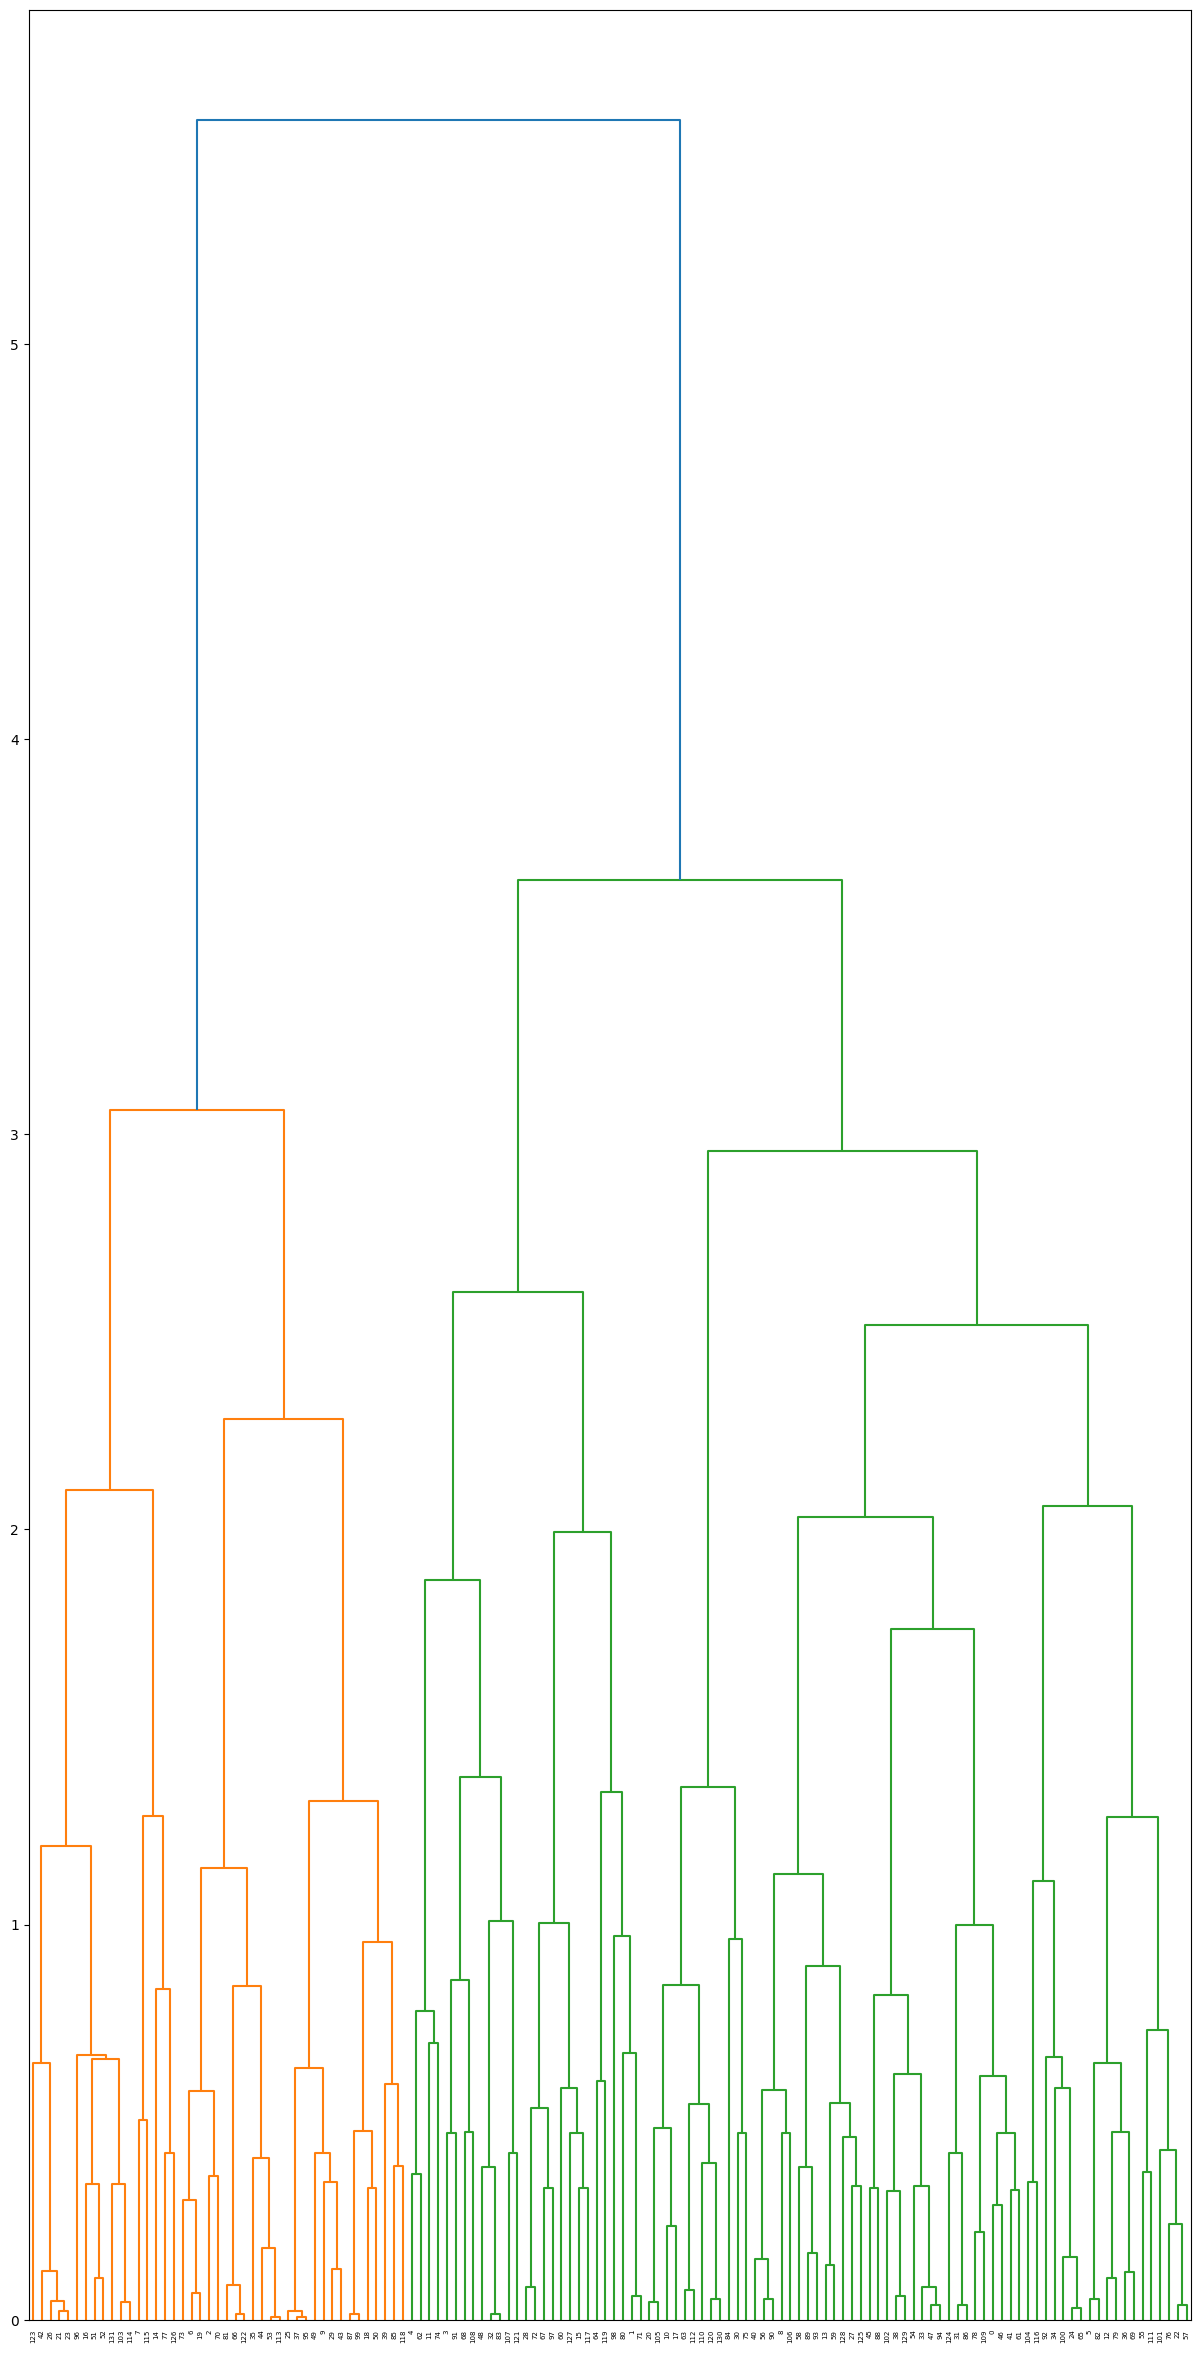

In [14]:
fig = plt.figure(figsize = (15, 30))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix)
plt.show()

In [22]:
new_dt["cluster_label"] = fcluster(distance_matrix, 3, criterion='maxclust')
new_dt.groupby('cluster_label').mean()

,0,1,2,3,4
cluster_label,,,,,
1,0.499024,0.988372,0.356589,0.263566,0.310078
2,0.322872,0.240741,0.296296,0.555556,0.629630
3,0.577813,0.274194,0.301075,0.252688,0.188172


Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмы')

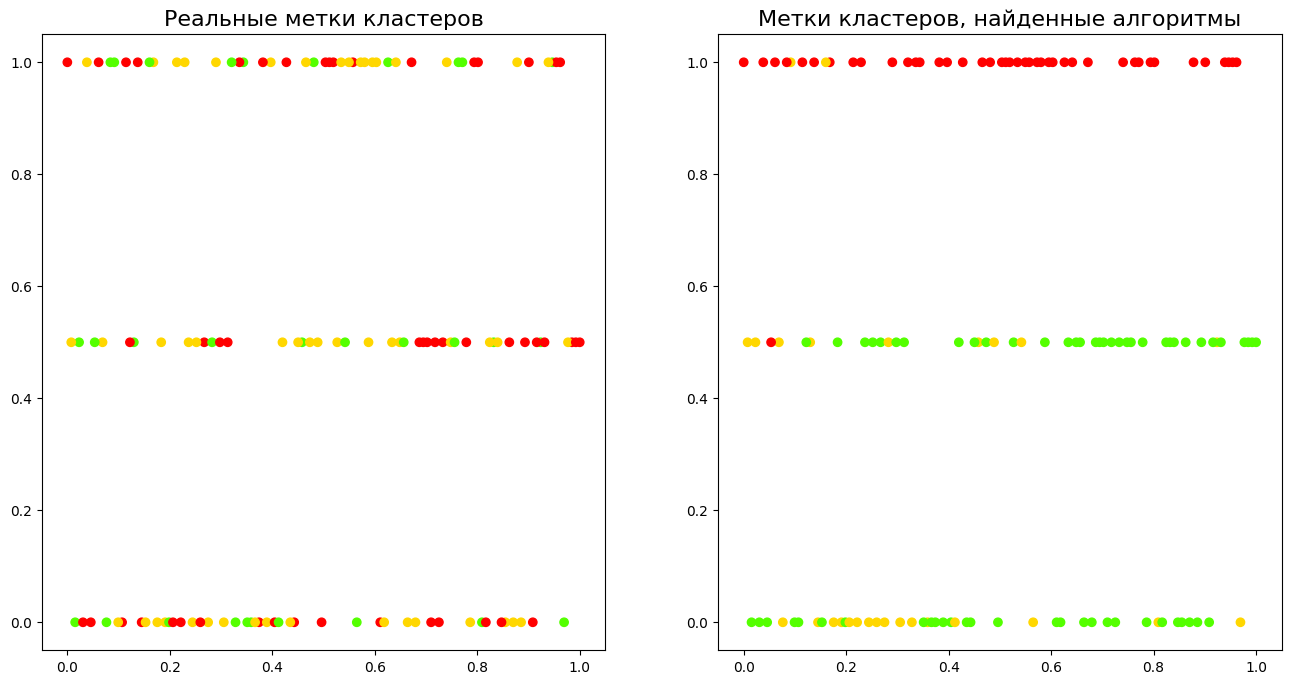

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
axes[0].scatter(new_dt.iloc[:, 0], new_dt.iloc[:, 1],
               c = target.values, cmap = plt.cm.prism)
axes[1].scatter(new_dt.iloc[:, 0], new_dt.iloc[:, 1],
               c = new_dt['cluster_label'], cmap = plt.cm.prism)
axes[0].set_title('Реальные метки кластеров', fontsize = 16)
axes[1].set_title('Метки кластеров, найденные алгоритмы', fontsize = 16)

### Оценка качества кластеризации:

In [24]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):7.000000000000001%
Скорректированная взаимная информация (AMI):7.000000000000001%
Индекс кластерного силуэта:45.0%
Показатель однородности:8.0%
Показатель полноты:8.16%
Метрика V-Measure:8.0%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [27]:
new_dt = data.copy()
distance_matrix = linkage(new_dt, method = 'single', metric = 'euclidean')
distance_matrix

array([[3.70000000e+01, 9.50000000e+01, 7.63358779e-03, 2.00000000e+00],
       [5.30000000e+01, 1.13000000e+02, 7.63358779e-03, 2.00000000e+00],
       [3.20000000e+01, 8.30000000e+01, 1.52671756e-02, 2.00000000e+00],
       [2.50000000e+01, 1.32000000e+02, 1.52671756e-02, 3.00000000e+00],
       [8.70000000e+01, 9.90000000e+01, 1.52671756e-02, 2.00000000e+00],
       [6.60000000e+01, 1.22000000e+02, 1.52671756e-02, 2.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 2.29007634e-02, 2.00000000e+00],
       [2.40000000e+01, 6.50000000e+01, 3.05343511e-02, 2.00000000e+00],
       [2.60000000e+01, 1.38000000e+02, 3.05343511e-02, 3.00000000e+00],
       [3.10000000e+01, 8.60000000e+01, 3.81679389e-02, 2.00000000e+00],
       [2.20000000e+01, 5.70000000e+01, 3.81679389e-02, 2.00000000e+00],
       [4.70000000e+01, 9.40000000e+01, 3.81679389e-02, 2.00000000e+00],
       [1.03000000e+02, 1.14000000e+02, 4.58015267e-02, 2.00000000e+00],
       [2.00000000e+01, 1.05000000e+02, 4.58015267e

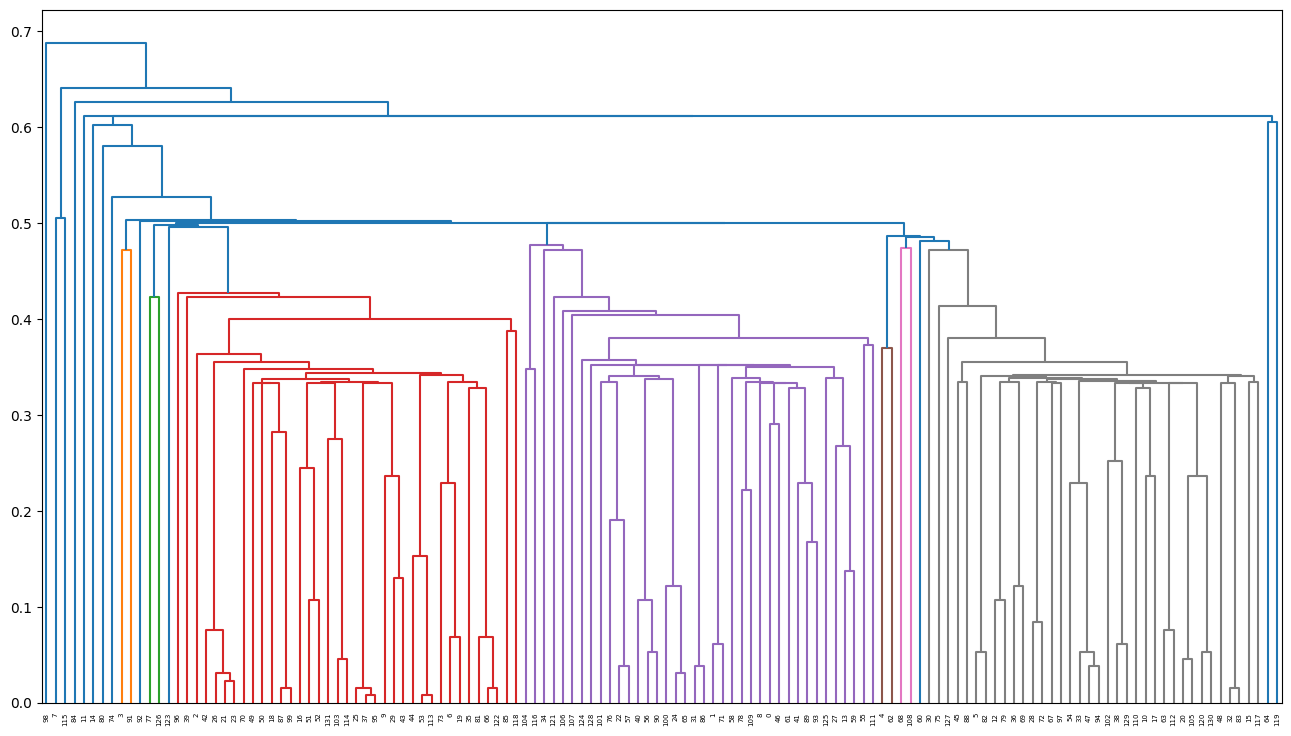

In [28]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix)
plt.show()

In [30]:
new_dt["cluster_label"] = fcluster(distance_matrix, 3, criterion='maxclust')
new_dt.groupby('cluster_label').mean()

,0,1,2,3,4
cluster_label,,,,,
1,0.854962,1.000000,0.833333,0.166667,1.000000
2,0.497130,0.488372,0.312661,0.315245,0.302326
3,0.160305,1.000000,0.000000,1.000000,1.000000


Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

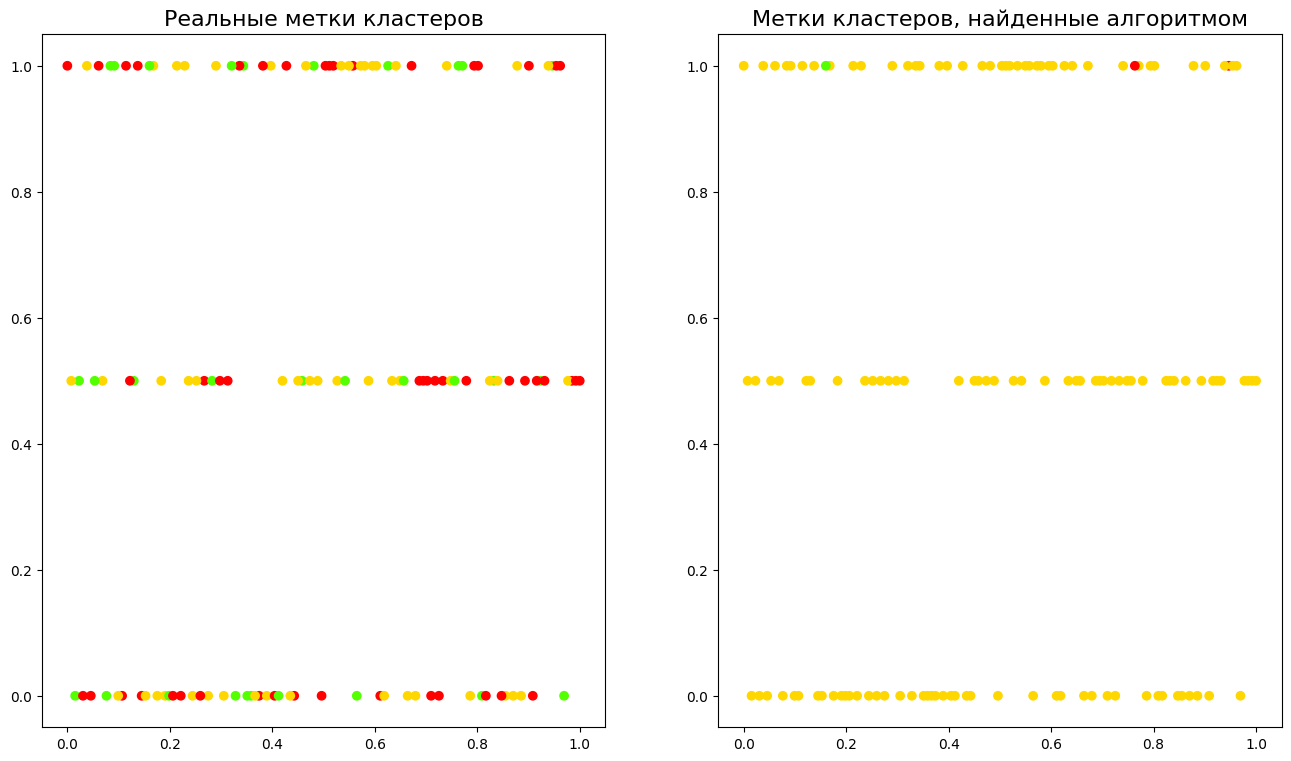

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=target.values, cmap=plt.cm.prism)
axes[1].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=new_dt["cluster_label"], cmap=plt.cm.prism)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

In [32]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):2.0%
Скорректированная взаимная информация (AMI):3.0%
Индекс кластерного силуэта:37.0%
Показатель однородности:3.0%
Показатель полноты:28.139999999999997%
Метрика V-Measure:6.0%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [33]:
new_dt = data.copy()
distance_matrix = linkage(new_dt, method = 'complete', metric = 'euclidean')
distance_matrix

array([[3.70000000e+01, 9.50000000e+01, 7.63358779e-03, 2.00000000e+00],
       [5.30000000e+01, 1.13000000e+02, 7.63358779e-03, 2.00000000e+00],
       [8.70000000e+01, 9.90000000e+01, 1.52671756e-02, 2.00000000e+00],
       [3.20000000e+01, 8.30000000e+01, 1.52671756e-02, 2.00000000e+00],
       [6.60000000e+01, 1.22000000e+02, 1.52671756e-02, 2.00000000e+00],
       [2.50000000e+01, 1.32000000e+02, 2.29007634e-02, 3.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 2.29007634e-02, 2.00000000e+00],
       [2.40000000e+01, 6.50000000e+01, 3.05343511e-02, 2.00000000e+00],
       [2.20000000e+01, 5.70000000e+01, 3.81679389e-02, 2.00000000e+00],
       [3.10000000e+01, 8.60000000e+01, 3.81679389e-02, 2.00000000e+00],
       [4.70000000e+01, 9.40000000e+01, 3.81679389e-02, 2.00000000e+00],
       [1.03000000e+02, 1.14000000e+02, 4.58015267e-02, 2.00000000e+00],
       [2.00000000e+01, 1.05000000e+02, 4.58015267e-02, 2.00000000e+00],
       [5.00000000e+00, 8.20000000e+01, 5.34351145e

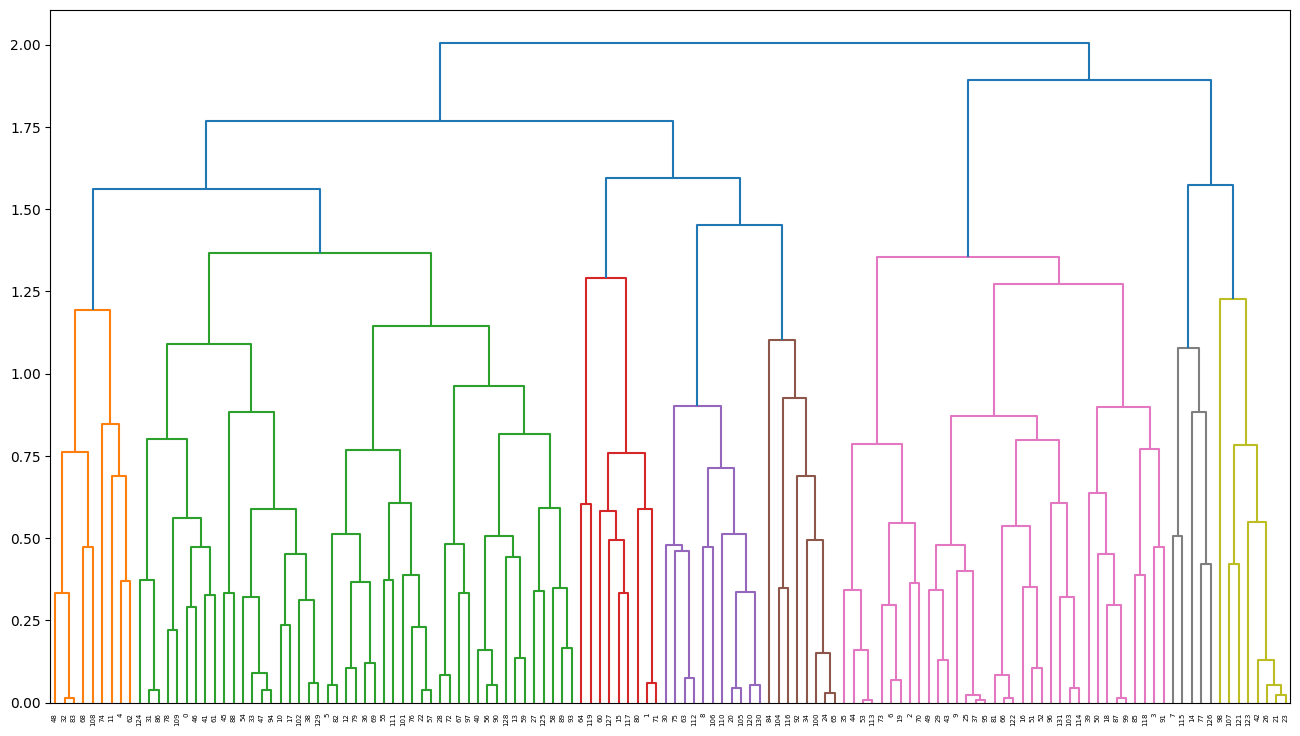

In [35]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix)
plt.show()

In [36]:
new_dt["cluster_label"] = fcluster(distance_matrix, 3, criterion='maxclust')
new_dt.groupby('cluster_label').mean()

,0,1,2,3,4
cluster_label,,,,,
1,0.507270,0.244048,0.293651,0.345238,0.293651
2,0.555289,0.971429,0.304762,0.323810,0.190476
3,0.304169,0.884615,0.512821,0.128205,0.820513


Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

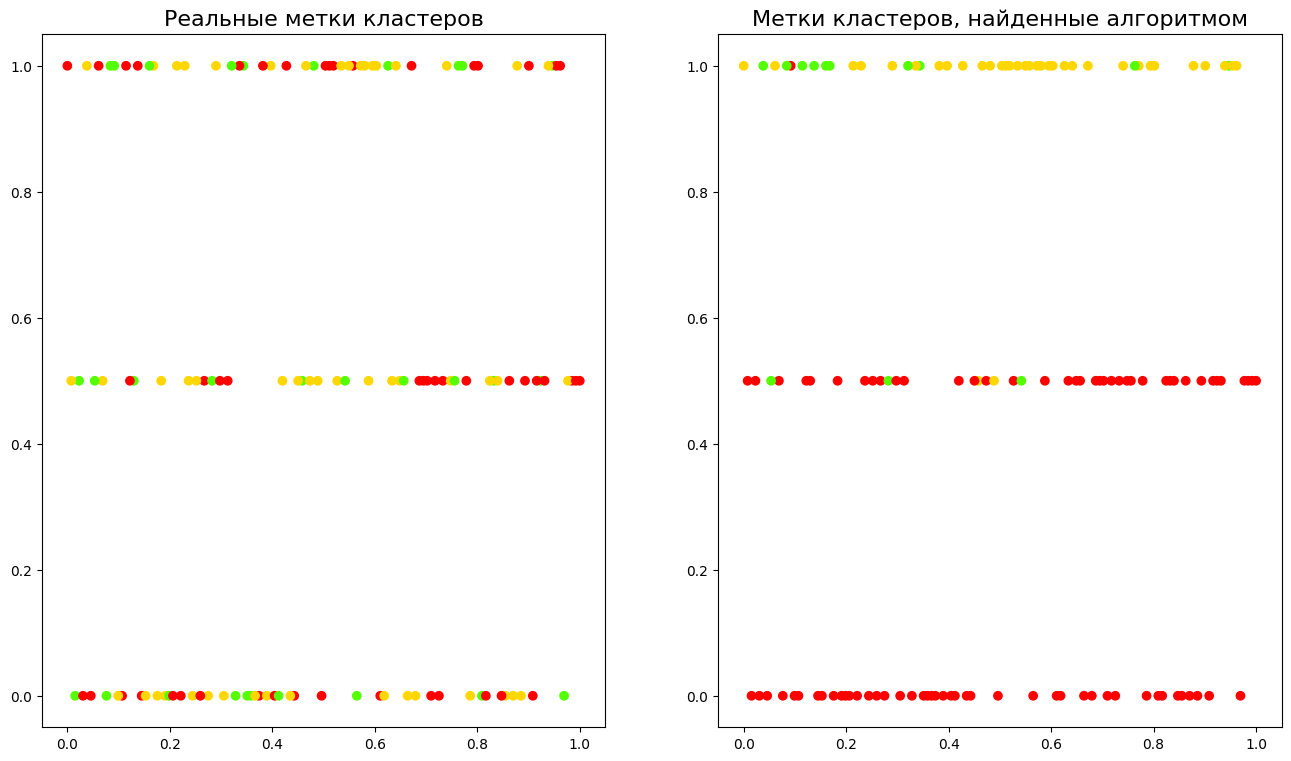

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=target.values, cmap=plt.cm.prism)
axes[1].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=new_dt["cluster_label"], cmap=plt.cm.prism)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

In [38]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):3.0%
Скорректированная взаимная информация (AMI):5.0%
Индекс кластерного силуэта:43.0%
Показатель однородности:6.0%
Показатель полноты:6.98%
Метрика V-Measure:6.0%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [39]:
new_dt = data.copy()
distance_matrix = linkage(new_dt, method = 'average', metric = 'euclidean')
distance_matrix

array([[5.30000000e+01, 1.13000000e+02, 7.63358779e-03, 2.00000000e+00],
       [3.70000000e+01, 9.50000000e+01, 7.63358779e-03, 2.00000000e+00],
       [6.60000000e+01, 1.22000000e+02, 1.52671756e-02, 2.00000000e+00],
       [8.70000000e+01, 9.90000000e+01, 1.52671756e-02, 2.00000000e+00],
       [3.20000000e+01, 8.30000000e+01, 1.52671756e-02, 2.00000000e+00],
       [2.50000000e+01, 1.33000000e+02, 1.90839695e-02, 3.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 2.29007634e-02, 2.00000000e+00],
       [2.40000000e+01, 6.50000000e+01, 3.05343511e-02, 2.00000000e+00],
       [2.20000000e+01, 5.70000000e+01, 3.81679389e-02, 2.00000000e+00],
       [3.10000000e+01, 8.60000000e+01, 3.81679389e-02, 2.00000000e+00],
       [4.70000000e+01, 9.40000000e+01, 3.81679389e-02, 2.00000000e+00],
       [2.60000000e+01, 1.38000000e+02, 4.19847328e-02, 3.00000000e+00],
       [1.03000000e+02, 1.14000000e+02, 4.58015267e-02, 2.00000000e+00],
       [2.00000000e+01, 1.05000000e+02, 4.58015267e

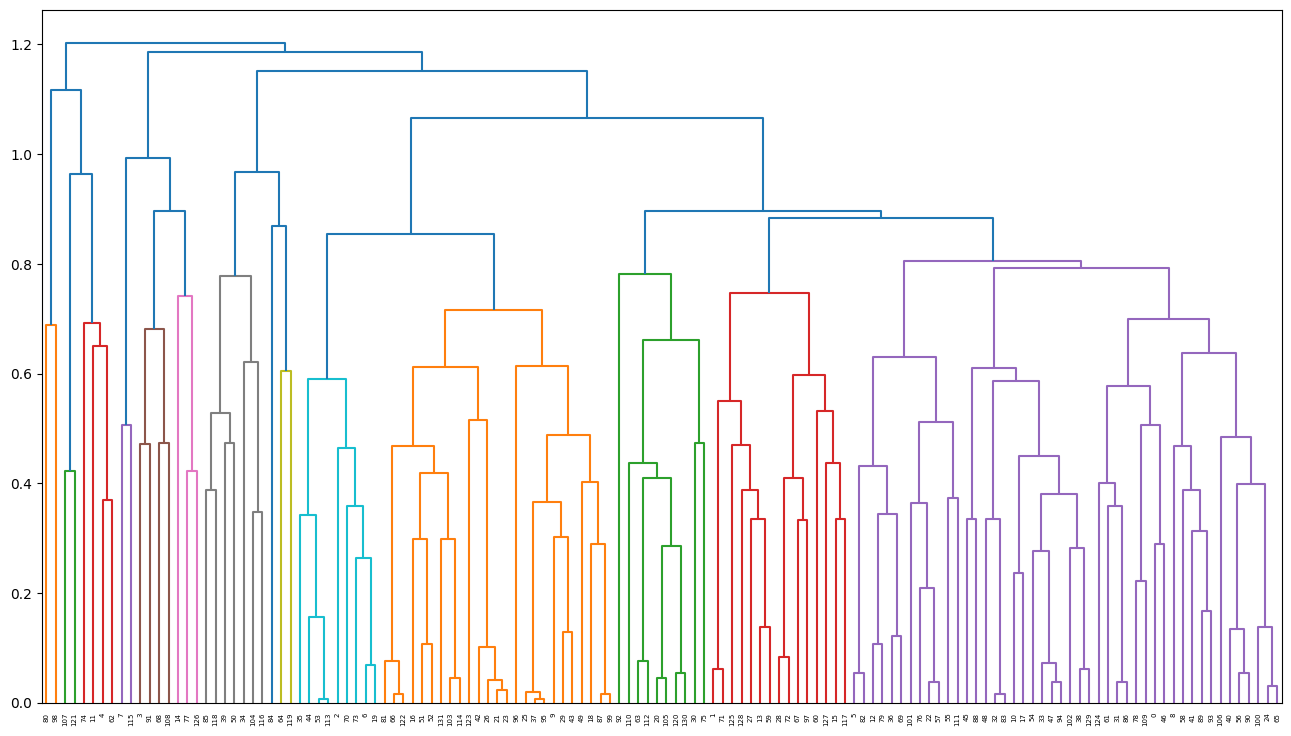

In [40]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix)
plt.show()

#### Назначение меток кластеров

In [41]:
new_dt["cluster_label"] = fcluster(distance_matrix, 3, criterion='maxclust')
new_dt.groupby('cluster_label').mean()

,0,1,2,3,4
cluster_label,,,,,
1,0.547710,0.375000,0.166667,0.583333,0.958333
2,0.434266,0.611111,0.888889,0.185185,0.740741
3,0.501825,0.500000,0.284058,0.310145,0.240580


Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

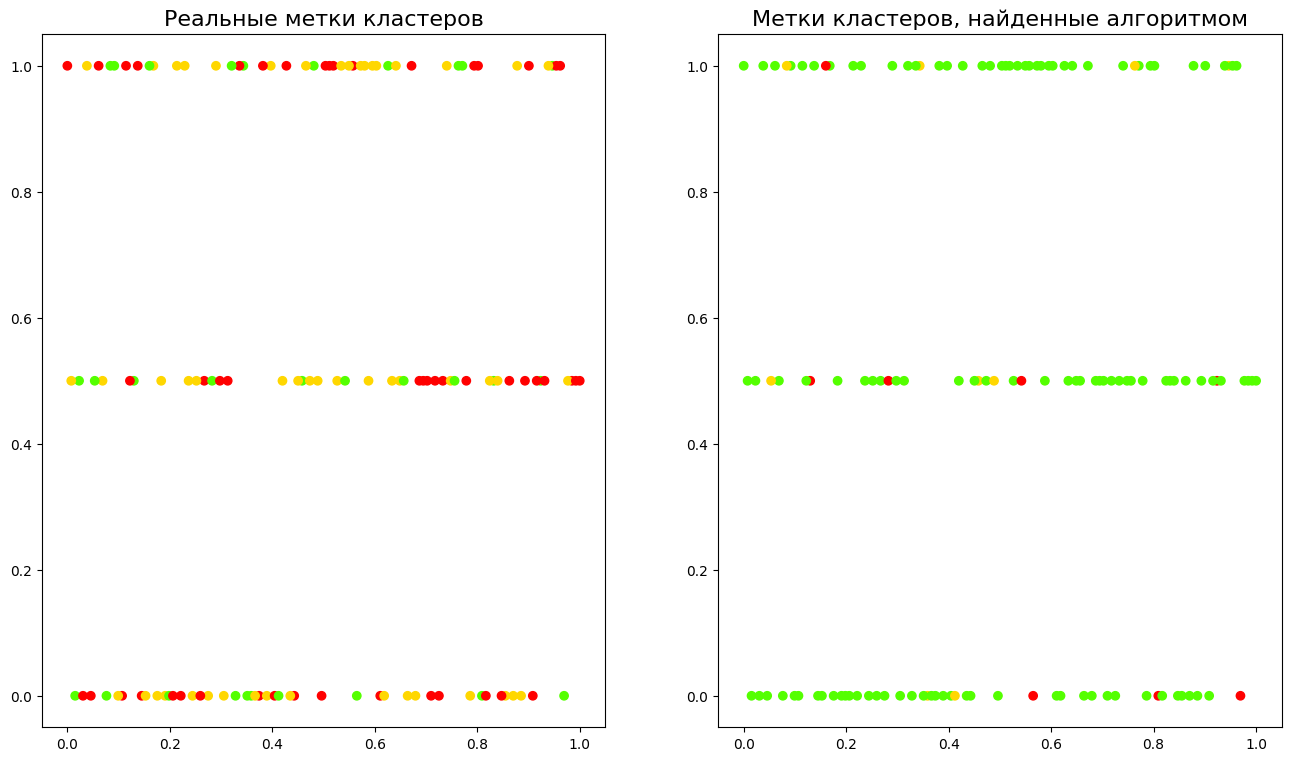

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=target.values, cmap=plt.cm.prism)
axes[1].scatter(new_dt.iloc[:,0], new_dt.iloc[:,1],
                c=new_dt["cluster_label"], cmap=plt.cm.prism)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

In [43]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):14.000000000000002%
Скорректированная взаимная информация (AMI):24.0%
Индекс кластерного силуэта:40.0%
Показатель однородности:18.0%
Показатель полноты:41.17%
Метрика V-Measure:25.0%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [44]:
new_dt = data.copy()

## ИТЕРАЦИОННЫЕ АЛГОРИТМЫ КЛАСТЕРНОГО АНАЛИЗА

#### Расчет показателей WCSS и Silh при разном числе кластеров

In [119]:
WCSS = []
Silh = []

for i in range(2, 11):
    model = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    model.fit(scaled_data)
    new_dt['cluster_labels'] = model.fit_predict(scaled_data)
    WCSS.append(model.inertia_)
    Silh.append(silhouette_score(scaled_data, new_dt['cluster_labels'],
                               metric = 'euclidean'))

In [120]:
Silh

[0.2249418829179293,
 0.2005983532192783,
 0.19506759905430174,
 0.21124839304168358,
 0.20765332605168094,
 0.20764512410323108,
 0.2158557240747965,
 0.2158164141445924,
 0.20382289701185363]

#### Построение графических зависимостей для silhouette score

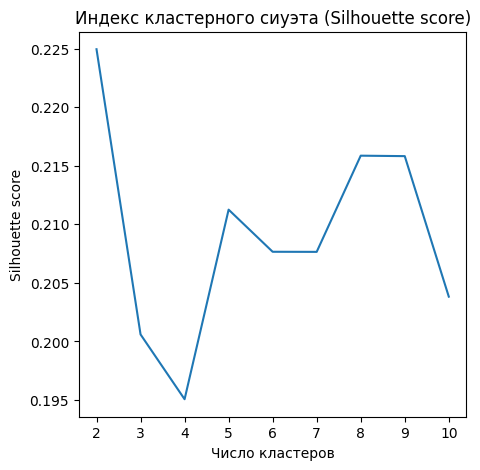

In [121]:
fig = plt.figure(figsize = (5, 5))
plt.plot(range(2, 11), Silh)
plt.title('Индекс кластерного сиуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

#### Графическая зависимость, построенная для значений индекса кластерного силуэта Silh, вычисленных при разном числе кластеров

In [122]:
WCSS

[55.54820191178428,
 47.93905449854122,
 42.592790901433695,
 37.40239797603878,
 34.12474554739496,
 31.213812639759205,
 29.289930602969235,
 27.15903091224098,
 25.525757078927498]

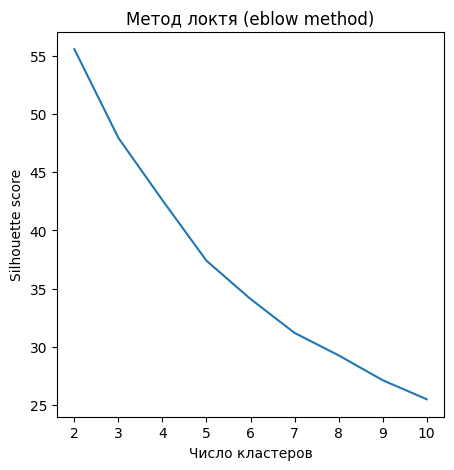

In [123]:
fig = plt.figure(figsize = (5, 5))
plt.plot(range(2, 11),  WCSS)
plt.title('Метод локтя (eblow method)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

#### Графическая зависимость, построенная для значений общей суммы квадратов внутрикластерных расстояний WCSS, вычисленных при разном числе кластеров

In [124]:
new_dt = data.copy()
model = KMeans(n_clusters=3, n_init=10)
model.fit(new_dt)

KMeans(n_clusters=3, n_init=10)

In [125]:
prediction = model.predict(new_dt)
prediction[:10]

array([2, 1, 2, 0, 1, 1, 2, 0, 2, 2])

In [126]:
new_dt['cluster_labels'] = prediction

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

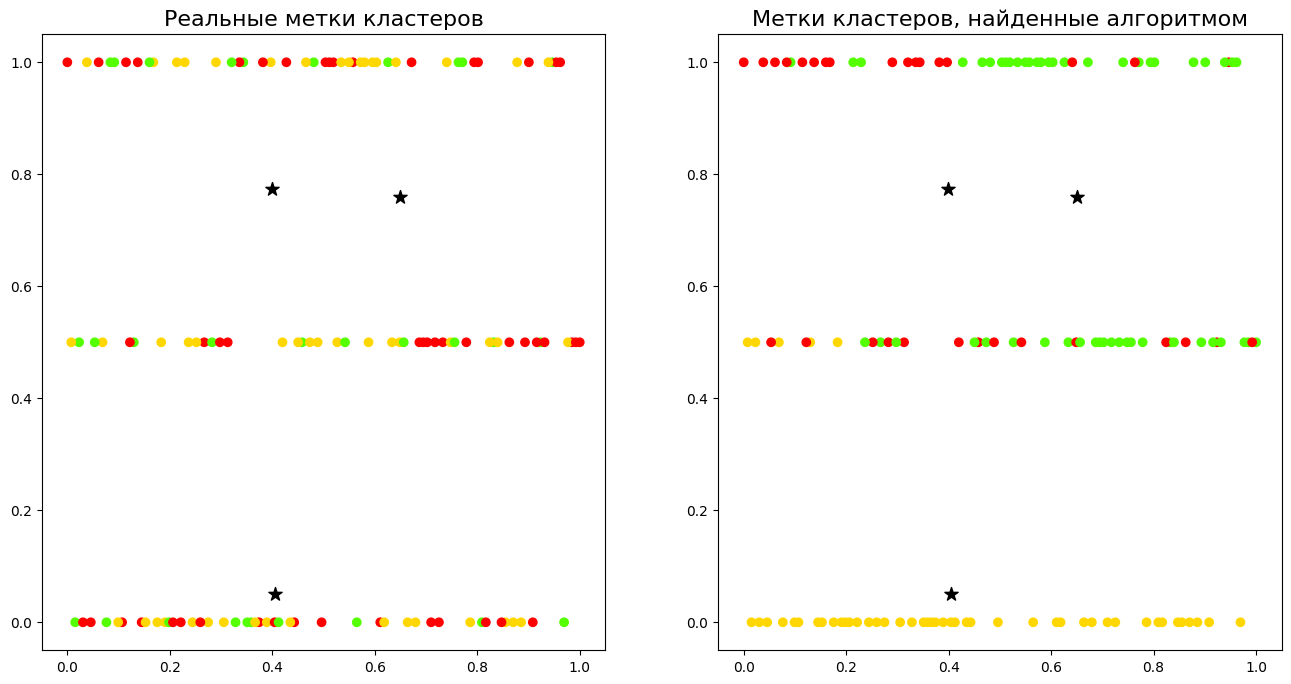

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c = target.values, cmap=plt.cm.prism)
# Вывод центроидов кластеров
axes[0].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
                s = 100, c = 'black', label = 'Centroids', marker='*')
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=new_dt['cluster_labels'], cmap=plt.cm.prism)
# Вывод центроидов кластеров
axes[1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids',  marker='*')
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

#### Результаты визуализации набора данных по первому и второму признаку при числе кластеров, равном 3


Анализ значений индекса кластерного силуэта Silh и общей суммы квадратов внутрикластерных расстояний WCSS, вычисленных при разном числе кластеров, и графических зависимостей, построенных на их основе, позволяет сделать следующие выводы.
При использовании индекса кластерного силуэта Silh, который должен
быть максимизирован, в качестве оптимального числа кластеров следует выбрать число, равное 2, при котором значение индекса кластерного силуэта Silh
равно 0.255.
При использовании метода локтя elbow в качестве оптимального числа
кластеров следует выбрать число, равное 3. В этом случае нужно ориентироваться на максимальное изменение общей суммы квадратов внутрикластерных
расстояний WCSS при увеличении числа кластеров на 1. На рис. 30 максимальному изменению общей суммы квадратов внутрикластерных расстояний WCSS
соответствует «локоть» (максимальный изгиб на графике).

In [128]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):1.0%
Скорректированная взаимная информация (AMI):1.0%
Индекс кластерного силуэта:46.0%
Показатель однородности:2.0%
Показатель полноты:2.1%
Метрика V-Measure:2.0%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [129]:
new_dt = data.copy()

In [130]:
Silh = []
for i in range(2, 11):
    fcm=FCM(n_clusters=i, m=2, max_iter = 300, random_state=0)
    fcm.fit(scaled_data)
    new_dt['cluster_labels'] =fcm.predict (scaled_data)
    Silh.append(silhouette_score(scaled_data, new_dt['cluster_labels'],metric='euclidean'))

In [131]:
Silh

[0.21285829079946825,
 0.15410345825531982,
 0.12077895533713019,
 0.04963343421006139,
 0.1461479213482492,
 0.13658623701170344,
 0.1402079574143616,
 0.13973567862116512,
 0.1403199540768407]

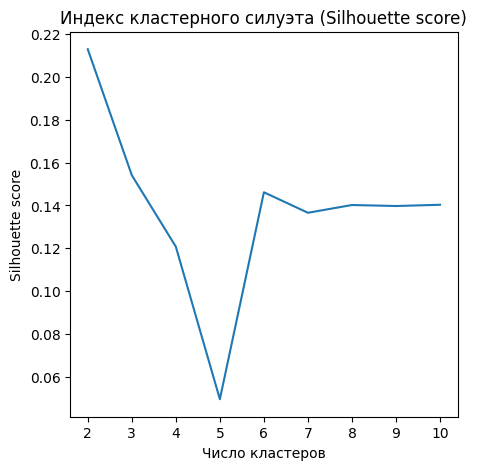

In [132]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [133]:
model = FCM(n_clusters = 3)
model.fit(new_dt.values)
center = model.centers

In [134]:
print(f"Скорректированный индекс Рэнда (ARI):{np.round(adjusted_rand_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Скорректированная взаимная информация (AMI):{np.round(adjusted_mutual_info_score(target.values[:,0],new_dt.iloc[:,-1]),2)*100}%")
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_dt, new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель однородности:{np.round(homogeneity_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")
print(f"Показатель полноты:{np.round(completeness_score(target.values[:,0], new_dt.iloc[:,-1]),4)*100}%")
print(f"Метрика V-Measure:{np.round(v_measure_score(target.values[:,0], new_dt.iloc[:,-1]),2)*100}%")

Скорректированный индекс Рэнда (ARI):3.0%
Скорректированная взаимная информация (AMI):4.0%
Индекс кластерного силуэта:51.0%
Показатель однородности:10.0%
Показатель полноты:5.62%
Метрика V-Measure:7.000000000000001%


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [135]:
from math import sqrt
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(math.sqrt((((X[i,0] - X[j,0]) ** 2) + ((X[i,1] - X[j,1]) ** 2))))
                             
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
                             
    return kn_distance

Text(0.5, 0, 'Eps pасстояние')

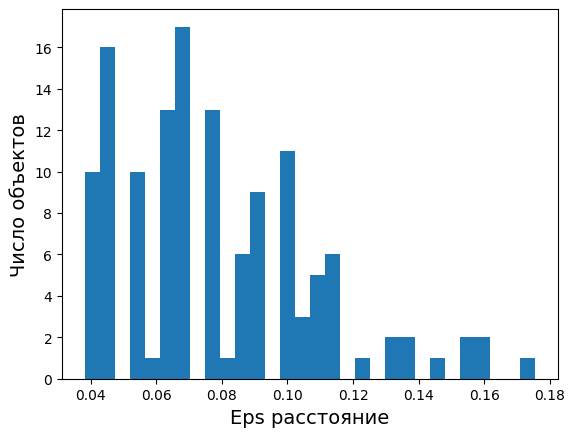

In [136]:
eps_dist = calculate_kn_distance(scaled_data, 6)
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps pасстояние', size=14)

#### Графическая зависимость, построенная для значений индекса кластерного силуэта Silh, вычисленных при разном числе кластеров

In [137]:
db = DBSCAN(eps=0.44, min_samples=6).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [138]:
print(f"Число кластеров: {n_clusters_}")
print(f"Число шумовых объектов: {n_noise_}")
print(f"Homogeneity: {homogeneity_score(target.values[:,0], labels)}")
print(f"Completeness: {completeness_score(target.values[:,0], labels)}")
print(f"V-measure: {v_measure_score(target.values[:,0], labels)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(target.values[:,0], labels)}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(target.values[:,0], labels)}")
print(f"Silhouette score: {silhouette_score(scaled_data, labels)}")

Число кластеров: 3
Число шумовых объектов: 36
Homogeneity: 0.27409540607577115
Completeness: 0.21211237670164593
V-measure: 0.23915301270424244
Adjusted Rand Index: 0.17491702498771075
Adjusted Mutual Information: 0.2243784205113746
Silhouette score: 0.12379592393618474


D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Python310\lib\site-packages\sklearn\metri

In [139]:
new_dt = data.copy()
model = DBSCAN(eps=0.44, min_samples=6)
model.fit_predict(new_dt)[:10]

array([ 0,  0, -1, -1, -1,  2,  1, -1,  0,  1], dtype=int64)

In [140]:
final_tar = target.copy()

In [142]:
DBSCAN_method = pd.DataFrame(model.labels_)
final_tar["DBSCAN"] = DBSCAN_method
final_tar.head(5)

,6,DBSCAN
0,-1.096326,0
1,0.207413,0
2,1.511153,-1
3,1.511153,-1
4,1.511153,-1


In [143]:
db = model.fit(new_dt)
labels = db.labels_
comp = PCA(n_components = 2).fit_transform(new_dt)
dff = pd.DataFrame(comp, columns = ["0", "1"])
final_tar = final_tar.join(dff)
final_tar.head(5)

,6,DBSCAN,0,1
0,-1.096326,0,0.003831,-0.296762
1,0.207413,0,0.100337,-0.066997
2,1.511153,-1,-0.437116,-0.533560
3,1.511153,-1,-0.081360,0.556271
4,1.511153,-1,0.586011,-0.321581


#### Результаты визуализации набора данных по первому и второму признаку при числе кластеров, равном 2 (Eps=0.44 и MinPts=6)

Text(0.5, 1.0, 'DBSCAN')

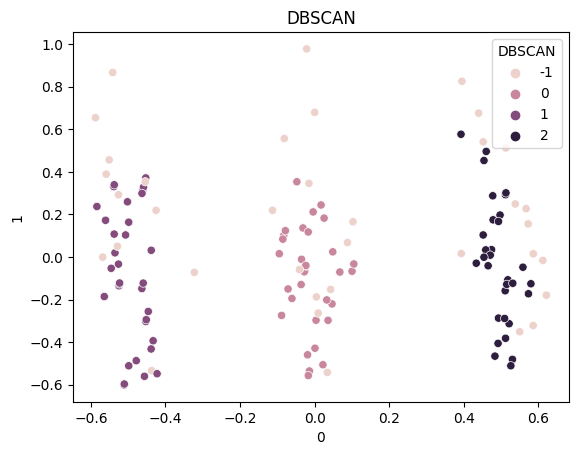

In [146]:
sns.scatterplot(x = final_tar["0"], y = final_tar["1"], hue = final_tar["DBSCAN"], data = final_tar)
plt.title("DBSCAN")

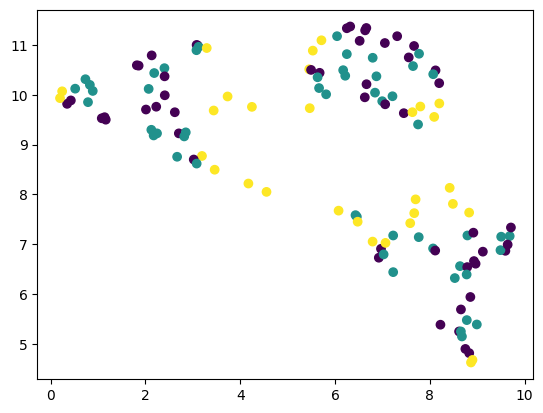

In [147]:
new_dt = data.copy()
embedding = UMAP(n_neighbors=10).fit_transform(new_dt)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], 
    c = target.values)
plt.show()

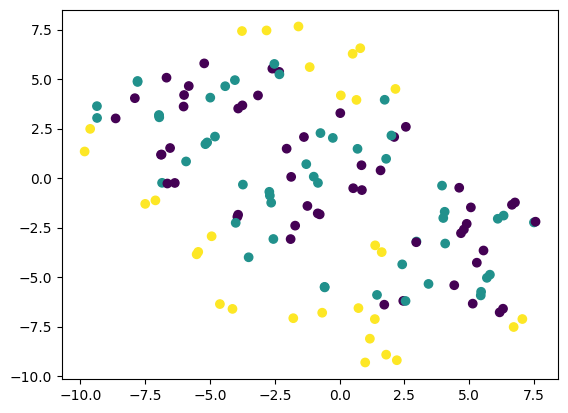

In [148]:
new_dt = data.copy()
tsne = TSNE()
embedding_tsne = tsne.fit_transform(new_dt)

plt.scatter(
    embedding_tsne[:, 0],
    embedding_tsne[:, 1], 
    c = target.values)
plt.show()